<a href="https://colab.research.google.com/github/aqnguy30/Stock-Prediction/blob/master/HW1_Nguyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessarry libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from tensorflow.keras.models import load_model
from pandas import DataFrame as df
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math


In [ ]:
#checking the tf version
tf.__version__

'2.4.1'

In [ ]:
#read data
data = pd.read_csv('originalStock.csv')
data

,Date,AAPL,AMZN,GOOG,MSFT
0,1/19/16,24.165001,574.479980,701.789978,50.560001
1,1/20/16,24.197500,571.770020,698.450012,50.790001
2,1/21/16,24.075001,575.020020,706.590027,50.480000
3,1/22/16,25.355000,596.380005,725.250000,52.290001
4,1/25/16,24.860001,596.530029,711.669983,51.790001
...,...,...,...,...,...
1271,2/4/21,137.389999,3331.000000,2062.370117,242.009995
1272,2/5/21,136.759995,3352.149902,2098.000000,242.199997
1273,2/8/21,136.910004,3322.939941,2092.909912,242.470001
1274,2/9/21,136.009995,3305.000000,2083.510010,243.770004


In [ ]:
data.corr()

,AAPL,AMZN,GOOG,MSFT
AAPL,1.000000,0.946827,0.946423,0.955552
AMZN,0.946827,1.000000,0.952675,0.971022
GOOG,0.946423,0.952675,1.000000,0.959127
MSFT,0.955552,0.971022,0.959127,1.000000


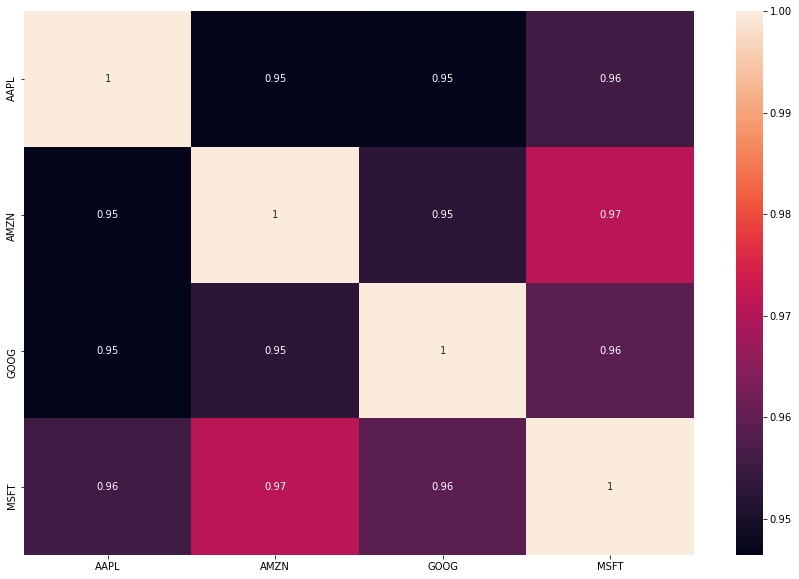

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
data.corr().to_csv('HW1_Nguyen_4x4CorrelationMatrix.csv', index=False)

In [ ]:
data['t'] = range(1, len(data) + 1)
data.set_index('t',inplace=True)
data

,Date,AAPL,AMZN,GOOG,MSFT
t,,,,,
1,1/19/16,24.165001,574.479980,701.789978,50.560001
2,1/20/16,24.197500,571.770020,698.450012,50.790001
3,1/21/16,24.075001,575.020020,706.590027,50.480000
4,1/22/16,25.355000,596.380005,725.250000,52.290001
5,1/25/16,24.860001,596.530029,711.669983,51.790001
...,...,...,...,...,...
1272,2/4/21,137.389999,3331.000000,2062.370117,242.009995
1273,2/5/21,136.759995,3352.149902,2098.000000,242.199997
1274,2/8/21,136.910004,3322.939941,2092.909912,242.470001


In [ ]:
data.to_csv('HW1_Nguyen_OriginalDataset.csv')

In [ ]:
data0 = pd.DataFrame(columns=['Date','t','AAPL(t)','AMZN(t)','GOOG(t)','MSFT(t)'])
data0['Date'] = data['Date'][3:1275]
data0['t'] = range(1, len(data0) + 1)
data0['AAPL(t)'] = data['AAPL'].iloc[3:1275]
data0['AMZN(t)'] = data['AMZN'].iloc[3:1275]
data0['GOOG(t)'] = data['GOOG'].iloc[3:1275]
data0['MSFT(t)'] = data['MSFT'].iloc[3:1275]
data0

,Date,t,AAPL(t),AMZN(t),GOOG(t),MSFT(t)
t,,,,,,
4,1/22/16,1,25.355000,596.380005,725.250000,52.290001
5,1/25/16,2,24.860001,596.530029,711.669983,51.790001
6,1/26/16,3,24.997499,601.250000,713.039978,52.169998
7,1/27/16,4,23.355000,583.349976,699.989990,51.220001
8,1/28/16,5,23.522499,635.349976,730.960022,52.060001
...,...,...,...,...,...,...
1271,2/3/21,1268,133.940002,3312.530029,2070.070068,243.000000
1272,2/4/21,1269,137.389999,3331.000000,2062.370117,242.009995
1273,2/5/21,1270,136.759995,3352.149902,2098.000000,242.199997


In [ ]:
data1 = pd.DataFrame(columns=['t','AAPL(t-1)','AMZN(t-1)','GOOG(t-1)','MSFT(t-1)'])
data1['AAPL(t-1)'] = data['AAPL'].iloc[2:1274]
data1['AMZN(t-1)'] = data['AMZN'].iloc[2:1274]
data1['GOOG(t-1)'] = data['GOOG'].iloc[2:1274]
data1['MSFT(t-1)'] = data['MSFT'].iloc[2:1274]
data1['t'] = range(1, len(data1) + 1)
data1

,t,AAPL(t-1),AMZN(t-1),GOOG(t-1),MSFT(t-1)
t,,,,,
3,1,24.075001,575.020020,706.590027,50.480000
4,2,25.355000,596.380005,725.250000,52.290001
5,3,24.860001,596.530029,711.669983,51.790001
6,4,24.997499,601.250000,713.039978,52.169998
7,5,23.355000,583.349976,699.989990,51.220001
...,...,...,...,...,...
1270,1268,134.990005,3380.000000,1927.510010,239.509995
1271,1269,133.940002,3312.530029,2070.070068,243.000000
1272,1270,137.389999,3331.000000,2062.370117,242.009995


In [ ]:
data2 = pd.DataFrame(columns=['t','AAPL(t-2)','AMZN(t-2)','GOOG(t-2)','MSFT(t-2)'])
data2['AAPL(t-2)'] = data['AAPL'].iloc[1:1273]
data2['AMZN(t-2)'] = data['AMZN'].iloc[1:1273]
data2['GOOG(t-2)'] = data['GOOG'].iloc[1:1273]
data2['MSFT(t-2)'] = data['MSFT'].iloc[1:1273]
data2['t'] = range(1, len(data2) + 1)
data2

,t,AAPL(t-2),AMZN(t-2),GOOG(t-2),MSFT(t-2)
t,,,,,
2,1,24.197500,571.770020,698.450012,50.790001
3,2,24.075001,575.020020,706.590027,50.480000
4,3,25.355000,596.380005,725.250000,52.290001
5,4,24.860001,596.530029,711.669983,51.790001
6,5,24.997499,601.250000,713.039978,52.169998
...,...,...,...,...,...
1269,1268,134.139999,3342.879883,1901.349976,239.649994
1270,1269,134.990005,3380.000000,1927.510010,239.509995
1271,1270,133.940002,3312.530029,2070.070068,243.000000


In [ ]:
data3 = pd.DataFrame(columns=['t','AAPL(t-3)','AMZN(t-3)','GOOG(t-3)','MSFT(t-3)'])
data3['AAPL(t-3)'] = data['AAPL'].iloc[0:1272]
data3['AMZN(t-3)'] = data['AMZN'].iloc[0:1272]
data3['GOOG(t-3)'] = data['GOOG'].iloc[0:1272]
data3['MSFT(t-3)'] = data['MSFT'].iloc[0:1272]
data3['t'] = range(1, len(data3) + 1)
data3

,t,AAPL(t-3),AMZN(t-3),GOOG(t-3),MSFT(t-3)
t,,,,,
1,1,24.165001,574.479980,701.789978,50.560001
2,2,24.197500,571.770020,698.450012,50.790001
3,3,24.075001,575.020020,706.590027,50.480000
4,4,25.355000,596.380005,725.250000,52.290001
5,5,24.860001,596.530029,711.669983,51.790001
...,...,...,...,...,...
1268,1268,131.960007,3206.199951,1835.739990,231.960007
1269,1269,134.139999,3342.879883,1901.349976,239.649994
1270,1270,134.990005,3380.000000,1927.510010,239.509995


In [ ]:
data4 = pd.DataFrame(columns=['t','Y(t)'])
data4['Y(t)'] = data['AMZN'].iloc[4:1276]
data4['t'] = range(1, len(data4) + 1)
data4   

,t,Y(t)
t,,
5,1,596.530029
6,2,601.250000
7,3,583.349976
8,4,635.349976
9,5,587.000000
...,...,...
1272,1268,3331.000000
1273,1269,3352.149902
1274,1270,3322.939941


In [ ]:
data0.set_index('t',inplace=True)
data1.set_index('t',inplace=True)
data2.set_index('t',inplace=True)
data3.set_index('t',inplace=True)
data4.set_index('t',inplace=True)
dataf = pd.concat([data0,data1,data2,data3,data4],axis=1,sort=False).reset_index()
dataf.rename(columns = {'index':'t'})

,t,Date,AAPL(t),AMZN(t),GOOG(t),MSFT(t),AAPL(t-1),AMZN(t-1),GOOG(t-1),MSFT(t-1),AAPL(t-2),AMZN(t-2),GOOG(t-2),MSFT(t-2),AAPL(t-3),AMZN(t-3),GOOG(t-3),MSFT(t-3),Y(t)
0,1,1/22/16,25.355000,596.380005,725.250000,52.290001,24.075001,575.020020,706.590027,50.480000,24.197500,571.770020,698.450012,50.790001,24.165001,574.479980,701.789978,50.560001,596.530029
1,2,1/25/16,24.860001,596.530029,711.669983,51.790001,25.355000,596.380005,725.250000,52.290001,24.075001,575.020020,706.590027,50.480000,24.197500,571.770020,698.450012,50.790001,601.250000
2,3,1/26/16,24.997499,601.250000,713.039978,52.169998,24.860001,596.530029,711.669983,51.790001,25.355000,596.380005,725.250000,52.290001,24.075001,575.020020,706.590027,50.480000,583.349976
3,4,1/27/16,23.355000,583.349976,699.989990,51.220001,24.997499,601.250000,713.039978,52.169998,24.860001,596.530029,711.669983,51.790001,25.355000,596.380005,725.250000,52.290001,635.349976
4,5,1/28/16,23.522499,635.349976,730.960022,52.060001,23.355000,583.349976,699.989990,51.220001,24.997499,601.250000,713.039978,52.169998,24.860001,596.530029,711.669983,51.790001,587.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1268,2/3/21,133.940002,3312.530029,2070.070068,243.000000,134.990005,3380.000000,1927.510010,239.509995,134.139999,3342.879883,1901.349976,239.649994,131.960007,3206.199951,1835.739990,231.960007,3331.000000
1268,1269,2/4/21,137.389999,3331.000000,2062.370117,242.009995,133.940002,3312.530029,2070.070068,243.000000,134.990005,3380.000000,1927.510010,239.509995,134.139999,3342.879883,1901.349976,239.649994,3352.149902
1269,1270,2/5/21,136.759995,3352.149902,2098.000000,242.199997,137.389999,3331.000000,2062.370117,242.009995,133.940002,3312.530029,2070.070068,243.000000,134.990005,3380.000000,1927.510010,239.509995,3322.939941
1270,1271,2/8/21,136.910004,3322.939941,2092.909912,242.470001,136.759995,3352.149902,2098.000000,242.199997,137.389999,3331.000000,2062.370117,242.009995,133.940002,3312.530029,2070.070068,243.000000,3305.000000


In [ ]:
dataf.to_csv('HW1_Nguyen_FinalDataset.csv', index=False)

In [ ]:
datafcor = dataf.drop(['t', 'Y(t)'], axis=1)
datafcor.corr()

,AAPL(t),AMZN(t),GOOG(t),MSFT(t),AAPL(t-1),AMZN(t-1),GOOG(t-1),MSFT(t-1),AAPL(t-2),AMZN(t-2),GOOG(t-2),MSFT(t-2),AAPL(t-3),AMZN(t-3),GOOG(t-3),MSFT(t-3)
AAPL(t),1.000000,0.946666,0.946074,0.955266,0.998845,0.946066,0.944804,0.954551,0.997956,0.945691,0.943938,0.954270,0.996965,0.945216,0.942784,0.953827
AMZN(t),0.946666,1.000000,0.952774,0.970841,0.945753,0.998901,0.951918,0.970262,0.945027,0.997946,0.951355,0.969923,0.944307,0.996968,0.950706,0.969468
GOOG(t),0.946074,0.952774,1.000000,0.959097,0.945011,0.951824,0.997449,0.957838,0.944322,0.951121,0.995492,0.957237,0.943553,0.950365,0.993250,0.956458
MSFT(t),0.955266,0.970841,0.959097,1.000000,0.954205,0.969794,0.957885,0.998887,0.953527,0.969055,0.957390,0.998417,0.952706,0.968153,0.956627,0.997731
AAPL(t-1),0.998845,0.945753,0.945011,0.954205,1.000000,0.946615,0.945751,0.955119,0.998839,0.945994,0.944477,0.954408,0.997945,0.945591,0.943617,0.954124
AMZN(t-1),0.946066,0.998901,0.951824,0.969794,0.946615,1.000000,0.953093,0.970775,0.945718,0.998898,0.952273,0.970190,0.944992,0.997943,0.951738,0.969851
GOOG(t-1),0.944804,0.951918,0.997449,0.957885,0.945751,0.953093,1.000000,0.959178,0.944658,0.952109,0.997430,0.957924,0.943961,0.951360,0.995460,0.957319
MSFT(t-1),0.954551,0.970262,0.957838,0.998887,0.955119,0.970775,0.959178,1.000000,0.954063,0.969717,0.957986,0.998883,0.953384,0.968965,0.957513,0.998411
AAPL(t-2),0.997956,0.945027,0.944322,0.953527,0.998839,0.945718,0.944658,0.954063,1.000000,0.946564,0.945406,0.954990,0.998832,0.945911,0.944135,0.954275
AMZN(t-2),0.945691,0.997946,0.951121,0.969055,0.945994,0.998898,0.952109,0.969717,0.946564,1.000000,0.953425,0.970697,0.945666,0.998896,0.952630,0.970111


In [ ]:
datafcor.corr().to_csv('HW1_Nguyen_16x16CorrelationMatrix.csv', index=False)

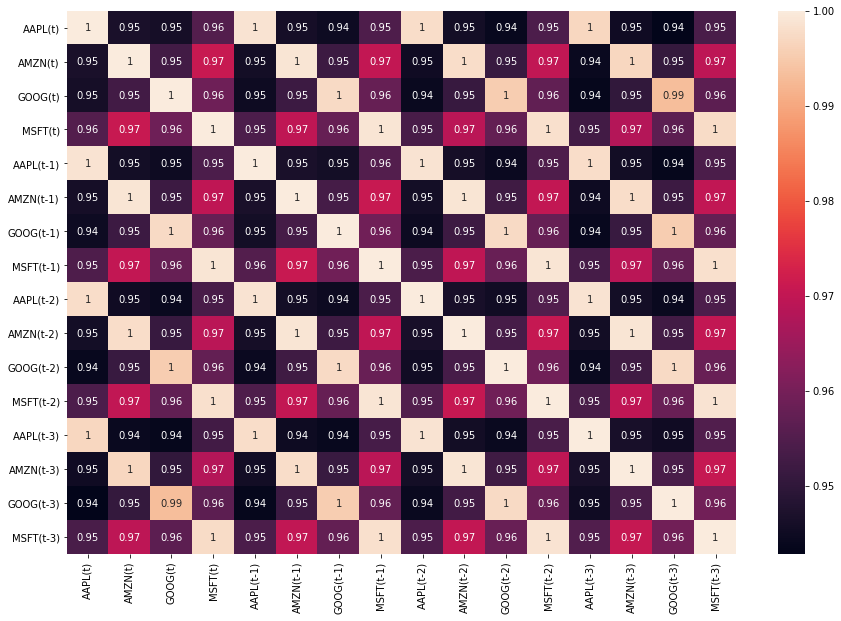

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(datafcor.corr(), annot=True)

In [ ]:
dataf
X = dataf.drop(['t', 'Date', 'Y(t)'], axis=1)
X = df.to_numpy(X)
Y = dataf['Y(t)']
Y = df.to_numpy(Y)
Y = Y.reshape((-1,1))
print(Y.shape)
print(Y)
#X

(1272, 1)
[[ 596.530029]
 [ 601.25    ]
 [ 583.349976]
 ...
 [3322.939941]
 [3305.      ]
 [3286.580078]]


In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2, random_state= 0)

In [ ]:
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1017, 16) (255, 16) (1017, 1) (255, 1)


In [ ]:
scaler = StandardScaler()
## Fit on training set only.
scaler.fit(Xtrain)
# Apply transform to both the training set and the test set.
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
Xtrain

array([[ 1.77818714e-01,  2.32802518e-01,  4.71656463e-01, ...,
         1.82276009e-01,  3.89202015e-01,  5.16621313e-01],
       [-1.05504691e+00, -1.40855051e+00, -1.45577786e+00, ...,
        -1.34243190e+00, -1.18133449e+00, -1.13141736e+00],
       [-3.47916931e-01,  9.31850636e-02,  1.76451629e-01, ...,
         1.04491040e-01,  1.29791842e-01,  4.20994075e-04],
       ...,
       [ 2.26626761e+00,  1.94202061e+00,  2.20317095e+00, ...,
         1.98750828e+00,  2.34564930e+00,  1.97738302e+00],
       [-3.51254971e-01, -1.90541261e-01, -2.54929879e-01, ...,
        -2.38814439e-01, -3.07575395e-01, -4.13299906e-01],
       [ 1.11937045e-01,  3.52354858e-01,  1.10926919e-01, ...,
         4.11663236e-01,  2.24553428e-01,  5.36438799e-03]])

In [ ]:
Ytrain

array([[1787.47998 ],
       [ 488.100006],
       [1625.949951],
       ...,
       [3117.02002 ],
       [1430.790039],
       [1755.25    ]])

In [ ]:
# Make an instance of the Model
pca = PCA(.95)
pca.fit(Xtrain)
#hmin
h95 = pca.n_components_
h95

1

In [ ]:
explained_var = []
for i in np.arange(1,4):
  pca = PCA(n_components=i)
  pca.fit(X) 
  explained_var.append(pca.explained_variance_ratio_.cumsum().round(2)) 
explained_var[2]

array([0.99, 1.  , 1.  ])

In [ ]:
Xtrain.shape
#hmax = math.floor((len(Xtrain.row) - 1) / (len(Xtrain.columns) + 2))

(1017, 16)

In [ ]:
#hmax = math.floor((len(Xtrain.rows) - 1) / (len(Xtrain.columns) + 2)) or 18h + 1 <= 1017
hmax = math.floor((1017 - 1) / (16 + 2))
hmax

56

In [ ]:
#####STOP

#Build and Compile Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Use your own hidden layer size
model.add(Dense(8, activation='relu', input_shape=(16,)))
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


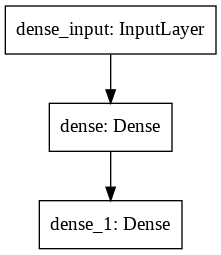

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
#model.layers[1].get_weights()[0]
model.layers[0].get_weights()

[array([[-0.04941964, -0.41617644,  0.41949177, -0.20576847, -0.00292599,
         -0.31421506,  0.02221835,  0.0169909 ],
        [ 0.3013097 ,  0.06404698, -0.31691778,  0.2110337 , -0.26908457,
          0.11844122,  0.10342753,  0.30170536],
        [ 0.17341936,  0.21170628, -0.01427746, -0.01577926, -0.14973915,
         -0.06350708,  0.3644054 ,  0.22295034],
        [-0.17010546,  0.02643681, -0.44013596,  0.16440833,  0.17530799,
         -0.20915794, -0.3199594 , -0.11104608],
        [ 0.08441043,  0.00485229, -0.49968505, -0.35405862, -0.1612531 ,
          0.07874787,  0.10931969, -0.4696312 ],
        [ 0.12646139, -0.02393925, -0.0887965 ,  0.15548956, -0.1558832 ,
          0.48137605,  0.0045917 ,  0.4499588 ],
        [ 0.30831385,  0.19924128, -0.3386768 ,  0.3972379 ,  0.09637153,
         -0.19600916,  0.37713408, -0.25647295],
        [ 0.07169032,  0.40760267, -0.01231194,  0.11579263,  0.32116938,
          0.462731  ,  0.32102525, -0.30641735],
        [ 0.2447

In [ ]:
Ytrain.shape

(1017, 1)

In [ ]:
# You may need to tune your learning_rate
model.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss=losses.MeanSquaredError())

# For recording training loss over the whole training set
# at the end of each epoch.
class MyHistory(callbacks.Callback):
  def on_train_begin(self, logs=None):
    self.real_loss = []
  def on_epoch_end(self, epoch, logs=None):
    Ypred = self.model.predict(Xtrain)
    loss_value = self.model.loss(Ytrain,Ypred)
    self.real_loss.append(loss_value.numpy())

MyMonitor = MyHistory()


# For saving the best model during the whole training process.
checkpointer = callbacks.ModelCheckpoint(filepath='BestModel.h5',monitor='val_loss',save_best_only=True)

In [ ]:
#Training and predicting

#Train the model and store validation loss history in 'Monitor'.
#Value of 'epochs' should vary according to your own training results.
Monitor = model.fit(Xtrain,Ytrain,epochs=10,batch_size=25,validation_data=(Xtest,Ytest),callbacks=[checkpointer,MyMonitor])

Epoch 1/10
41/41 [==============================] - 1s 5ms/step - loss: 3093215.3214 - val_loss: 3136418.2500
Epoch 2/10
41/41 [==============================] - 0s 2ms/step - loss: 2820766.0774 - val_loss: 2948601.0000
Epoch 3/10
41/41 [==============================] - 0s 2ms/step - loss: 2733086.2917 - val_loss: 2649929.0000
Epoch 4/10
41/41 [==============================] - 0s 2ms/step - loss: 2516206.6964 - val_loss: 2261759.5000
Epoch 5/10
41/41 [==============================] - 0s 2ms/step - loss: 2016287.4375 - val_loss: 1859129.7500
Epoch 6/10
41/41 [==============================] - 0s 2ms/step - loss: 1728251.4435 - val_loss: 1486723.2500
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 1330183.4345 - val_loss: 1202724.7500
Epoch 8/10
41/41 [==============================] - 0s 2ms/step - loss: 1092771.8690 - val_loss: 1019151.8125
Epoch 9/10
41/41 [==============================] - 0s 2ms/step - loss: 935864.0432 - val_loss: 915904.1250
Epoch 10/10


In [ ]:
#Be carefual that in Keras, the loss of each epoch (stored in
#Monitor.history['loss']) is the average of the losses calculated on batches in that epoch.
#So it is not the real epoch loss over the whole training set. 
#Use MyMonitor.real_loss instead. But it is safe to use Monitor.history['val_loss'] for validation losses.
MyMonitor.real_loss

[3086213.8,
 2895024.8,
 2591593.0,
 2199029.8,
 1794806.4,
 1425531.6,
 1149528.9,
 977026.94,
 885114.3,
 840150.6]

In [ ]:
Monitor.history['val_loss']

[3136418.25,
 2948601.0,
 2649929.0,
 2261759.5,
 1859129.75,
 1486723.25,
 1202724.75,
 1019151.8125,
 915904.125,
 862087.875]

In [ ]:
model.evaluate(Xtest,Ytest)

8/8 [==============================] - 0s 2ms/step - loss: 862087.8125


862087.8125

In [ ]:
# Restore the best model

from tensorflow.keras.models import load_model

best_model = load_model('BestModel.h5')
best_model.evaluate(Xtest,Ytest)

8/8 [==============================] - 0s 2ms/step - loss: 862087.8125


862087.8125

In [ ]:
best_model.predict(Xtest)

array([[2752.0642 ],
       [2300.315  ],
       [ 562.45776],
       [ 588.14514],
       [ 618.88153],
       [ 410.952  ],
       [1788.8021 ],
       [ 277.97488],
       [ 411.2407 ],
       [ 622.4424 ],
       [ 977.2252 ],
       [2953.4788 ],
       [ 290.83597],
       [ 229.62192],
       [ 185.20847],
       [ 936.46704],
       [ 195.90134],
       [ 707.2051 ],
       [ 622.3204 ],
       [2890.2512 ],
       [ 424.6141 ],
       [3428.7654 ],
       [2264.1426 ],
       [ 855.7322 ],
       [ 417.18515],
       [ 187.9667 ],
       [ 989.16876],
       [ 947.93536],
       [1498.0298 ],
       [ 608.8627 ],
       [3178.981  ],
       [1016.55865],
       [ 591.9205 ],
       [ 440.74136],
       [ 434.94867],
       [2967.2468 ],
       [ 584.07104],
       [ 173.10104],
       [ 688.4016 ],
       [ 860.5487 ],
       [ 491.8142 ],
       [2666.252  ],
       [ 559.653  ],
       [ 396.3803 ],
       [2695.172  ],
       [ 567.5106 ],
       [2985.8787 ],
       [ 410.

In [ ]:
# Be careful about the difference
print(Ytest.shape, best_model.predict(Xtest).shape)

(255, 1) (255, 1)


In [ ]:
#gradients and automatic differentiation
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  #tape.watch(x)
  y=x**2

dy_dx = tape.gradient(y,x)
dy_dx.numpy()

6.0

In [ ]:
from tensorflow.keras import losses, optimizers

optimizer = optimizers.Adam(learning_rate=0.01)
loss_fn = losses.MeanSquaredError()

In [ ]:
model.compile(optimizer=optimizer,loss=loss_fn)

In [ ]:
#Prepare the training set
batch_size = 25

train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain))
train_dataset.element_spec


(TensorSpec(shape=(16,), dtype=tf.float64, name=None),
 TensorSpec(shape=(1,), dtype=tf.float64, name=None))

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
train_dataset.element_spec

(TensorSpec(shape=(None, 16), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))

In [ ]:
list(train_dataset.as_numpy_iterator())[0][1].shape

(25, 1)

In [ ]:
#train the model “manually”

batch_loss = []
gradsNorm = []
epoch_loss = []
val_loss = []
best_val_loss = model.evaluate(Xtest,Ytest,verbose=0)
#tune `epochs` according to your data
epochs = 150

In [ ]:
best_val_loss

862087.8125

In [ ]:
#Writing a training loop from scratch
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_batch_pred = model(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train,y_batch_pred)
    grads = tape.gradient(loss_value, model.trainable_weights)
    gradsNorm.append(   np.sqrt( sum( [ np.sum( np.square(g.numpy()))  for g in grads ] ) )  )
    batch_loss.append(loss_value.numpy())
    optimizer.apply_gradients( zip( grads,model.trainable_weights ) )
  epoch_loss_value = model.evaluate(Xtrain,Ytrain,verbose=0)
  epoch_loss.append(epoch_loss_value)

  val_loss_value = model.evaluate(Xtest,Ytest,verbose=0)
  val_loss.append(val_loss_value)
  print("epoch_loss: %.4f - val_loss:%.4f" %  (float(epoch_loss_value), float(val_loss_value) )    )

  if val_loss_value < best_val_loss:
    best_val_loss=val_loss_value
    model.save('bestModel')


Start of epoch 0
epoch_loss: 1564.5337 - val_loss:1543.0360

Start of epoch 1
epoch_loss: 1596.0664 - val_loss:1574.1462

Start of epoch 2
epoch_loss: 1554.4043 - val_loss:1531.1202
INFO:tensorflow:Assets written to: bestModel/assets

Start of epoch 3
epoch_loss: 1563.4869 - val_loss:1552.7523

Start of epoch 4
epoch_loss: 1555.7262 - val_loss:1520.7864
INFO:tensorflow:Assets written to: bestModel/assets

Start of epoch 5
epoch_loss: 1775.3129 - val_loss:1724.7913

Start of epoch 6
epoch_loss: 1679.5306 - val_loss:1627.8575

Start of epoch 7
epoch_loss: 1645.2561 - val_loss:1613.9172

Start of epoch 8
epoch_loss: 1576.4189 - val_loss:1553.7157

Start of epoch 9
epoch_loss: 1502.2655 - val_loss:1497.3673
INFO:tensorflow:Assets written to: bestModel/assets

Start of epoch 10
epoch_loss: 1506.7678 - val_loss:1516.9700

Start of epoch 11
epoch_loss: 1499.0713 - val_loss:1507.3981

Start of epoch 12
epoch_loss: 1561.4623 - val_loss:1563.2142

Start of epoch 13
epoch_loss: 1494.9475 - val_l

In [ ]:
np.array(val_loss)

array([2.92397700e+06, 2.04398975e+06, 1.14734325e+06, 8.50840812e+05,
       7.84636562e+05, 7.14026562e+05, 6.18649812e+05, 5.02480469e+05,
       3.72888188e+05, 2.61230750e+05, 1.73115688e+05, 1.16656445e+05,
       8.67773672e+04, 7.30868359e+04, 6.67892188e+04, 6.29198047e+04,
       6.08583984e+04, 5.77915977e+04, 5.54741484e+04, 5.26351758e+04,
       5.07230117e+04, 4.85874062e+04, 4.70032695e+04, 4.50578828e+04,
       4.27883594e+04, 4.10943594e+04, 3.90461680e+04, 3.71801289e+04,
       3.59622773e+04, 3.42981641e+04, 3.33813711e+04, 3.22213516e+04,
       3.10717656e+04, 2.94563477e+04, 2.84704219e+04, 2.73034238e+04,
       2.60960566e+04, 2.46722051e+04, 2.37170801e+04, 2.26971660e+04,
       2.13829062e+04, 2.03981797e+04, 1.92610859e+04, 1.81412266e+04,
       1.68461992e+04, 1.59667070e+04, 1.51416133e+04, 1.38888320e+04,
       1.30792178e+04, 1.20745361e+04, 1.14817061e+04, 1.03829961e+04,
       9.56025098e+03, 8.83614355e+03, 8.17479980e+03, 7.62371484e+03,
      

In [ ]:
bestModel = tf.keras.models.load_model('bestModel')

In [ ]:
model.evaluate(Xtest,Ytest)

8/8 [==============================] - 0s 1ms/step - loss: 1536.3951


1536.3951416015625

In [ ]:
bestModel.evaluate(Xtest,Ytest)

8/8 [==============================] - 0s 2ms/step - loss: 1535.2327


1535.232666015625

In [ ]:
#access hidden layer activity
#use bestModel.layers[0] as a function.


bestModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bestModel.layers[0]

In [ ]:
bestModel.layers[0](X).numpy()[0]

array([1.8909199e+03, 0.0000000e+00, 1.6666725e+04, 0.0000000e+00,
       1.7110039e+04, 0.0000000e+00, 6.6659832e+00, 0.0000000e+00],
      dtype=float32)

In [ ]:
################Test 8
#Build and Compile Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model8 = Sequential()

# Use your own hidden layer size
model8.add(Dense(56, activation='relu', input_shape=(16,)))
model8.add(Dense(1, activation='relu'))

print(model8.summary())

# You may need to tune your learning_rate
#model8.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss=losses.MeanSquaredError())

optimizer = optimizers.Adam(learning_rate=0.01)
loss_fn = losses.MeanSquaredError()

model8.compile(optimizer=optimizer,loss=loss_fn)

#Prepare the training set
batch_size = 25

train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain))
train_dataset.element_spec

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
train_dataset.element_spec

list(train_dataset.as_numpy_iterator())[0][1].shape

#train the model8 “manually”
batch_loss = []
gradsNorm = []
epoch_loss = []
val_loss = []
best_val_loss = model8.evaluate(Xtest,Ytest,verbose=0)
#tune `epochs` according to your data
epochs = 150

#best_val_loss

#Writing a training loop from scratch
import timeit
tic=timeit.default_timer()
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_batch_pred = model8(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train,y_batch_pred)
    grads = tape.gradient(loss_value, model8.trainable_weights)
    gradsNorm.append(   np.sqrt( sum( [ np.sum( np.square(g.numpy()))  for g in grads ] ) )  )
    batch_loss.append(loss_value.numpy())
    optimizer.apply_gradients( zip( grads,model8.trainable_weights ) )
  epoch_loss_value = model8.evaluate(Xtrain,Ytrain,verbose=0)
  epoch_loss.append(epoch_loss_value)

  val_loss_value = model8.evaluate(Xtest,Ytest,verbose=0)
  val_loss.append(val_loss_value)
  print("epoch_loss: %.4f - val_loss:%.4f" %  (float(epoch_loss_value), float(val_loss_value) )    )

  if val_loss_value < best_val_loss:
    best_val_loss=val_loss_value
    model8.save('bestModel8')

toc=timeit.default_timer()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 56)                952       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 57        
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________
None

Start of epoch 0
epoch_loss: 2987192.2500 - val_loss:3039274.5000
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 1
epoch_loss: 2305583.2500 - val_loss:2370716.5000
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 2
epoch_loss: 1367564.3750 - val_loss:1428155.5000
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 3
epoch_loss: 890328.9375 - val_loss:922421.9375
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 4
epoch_loss: 7

In [ ]:
print(toc - tic) #elapsed time in seconds

95.68895764599984


In [ ]:
print(best_val_loss)

1493.893798828125


In [ ]:
#Best Model
bestModel8 = tf.keras.models.load_model('bestModel8')
print("\n Model8 val_loss")
model8.evaluate(Xtest,Ytest)
print("\n bestModel8 val_loss")
bestModel8.evaluate(Xtest,Ytest)


 Model8 val_loss
8/8 [==============================] - 0s 1ms/step - loss: 1534.5558

 bestModel8 val_loss
8/8 [==============================] - 0s 1ms/step - loss: 1493.8938


1493.893798828125

In [ ]:
print(math.floor(math.sqrt(len(gradsNorm))))
gradsNorm = [x/ math.floor(math.sqrt(len(gradsNorm))) for x in gradsNorm] 
print(gradsNorm)

78
[0.0, 0.0, 2.668013433877305, 9.894936181173863, 18.731510443134646, 166.94389024993316, 125.63634802909586, 231.63762943617056, 167.30221992229218, 229.03174852197284, 242.5450333345671, 127.98260656755835, 196.87498765953856, 173.93200810033386, 288.2363076539233, 230.72754288701603, 221.55164186516254, 301.67217594977967, 146.0494603049197, 243.78854741643124, 346.528145449152, 479.67008269374764, 471.79996339225823, 214.9138311032448, 461.6074834429633, 733.2271062339686, 457.5408445425617, 1144.8543294099493, 834.748153900624, 558.8633436277208, 485.7880502340134, 851.2706351566926, 535.851470240687, 594.847439267103, 265.43186591625914, 1540.9467096023534, 432.53314366056566, 311.5235765938639, 371.107281189515, 635.3725803893218, 1531.5855780227769, 834.0212433854105, 339.36716350197963, 947.8941903614416, 790.6091841534088, 1622.5962743779633, 1180.0200551427586, 986.6284858793539, 1830.6083633446567, 904.6939139340279, 846.7968652803648, 551.5878773056317, 891.9247670196244

In [ ]:
gradsNorm[0:10]

[0.0,
 0.0,
 2.668013433877305,
 9.894936181173863,
 18.731510443134646,
 166.94389024993316,
 125.63634802909586,
 231.63762943617056,
 167.30221992229218,
 229.03174852197284]

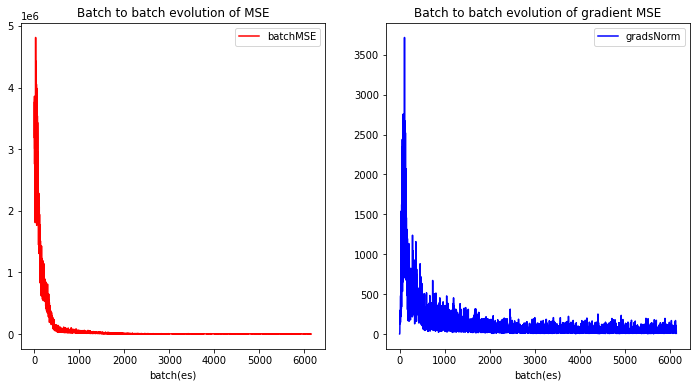

<Figure size 432x288 with 0 Axes>

In [ ]:
#create batch MSE, batch gradNorms
batch_df8 = pd.DataFrame(list(zip(gradsNorm, batch_loss)), columns = ["gradsNorm", "batchMSE"])
batch_df8.index.name = "Batch No."
batch_df8.head(10)

#plot
plt.subplot(1,2,1)
batch_df8['batchMSE'].plot(label = "batchMSE", color = "r", figsize = (12,6))
plt.title ("Batch to batch evolution of MSE")
plt.xlabel("batch(es)")

plt.legend()

plt.subplot(1,2,2)
batch_df8['gradsNorm'].plot(label = "gradsNorm", color = "b", figsize = (12,6))
plt.title ("Batch to batch evolution of gradient MSE")
plt.xlabel("batch(es)")
plt.legend()

plt.show()
plt.tight_layout()

In [ ]:
val_loss

[3039274.5,
 2370716.5,
 1428155.5,
 922421.9375,
 782153.0625,
 688783.125,
 559186.25,
 414008.125,
 278265.53125,
 180787.171875,
 118664.3671875,
 88092.984375,
 74675.5,
 69453.3359375,
 65646.3046875,
 61652.09765625,
 58554.98046875,
 55362.05078125,
 52894.3125,
 49934.09375,
 47562.87890625,
 44513.40625,
 41983.5078125,
 40124.234375,
 37653.26171875,
 35238.1953125,
 32869.71875,
 30985.744140625,
 29418.1328125,
 27265.533203125,
 25797.419921875,
 24144.3671875,
 22334.205078125,
 20943.978515625,
 19320.8125,
 18192.16015625,
 16547.2578125,
 15130.408203125,
 14275.9912109375,
 12960.3623046875,
 12609.83984375,
 11192.951171875,
 10230.2685546875,
 9464.2666015625,
 9027.65625,
 8179.4951171875,
 7459.38720703125,
 6902.10986328125,
 6344.3916015625,
 6063.7939453125,
 5423.81640625,
 5728.953125,
 4973.8603515625,
 4524.9404296875,
 4321.9736328125,
 4057.41796875,
 3827.959716796875,
 3813.848388671875,
 3417.6728515625,
 3219.81396484375,
 3326.82373046875,
 2996.554

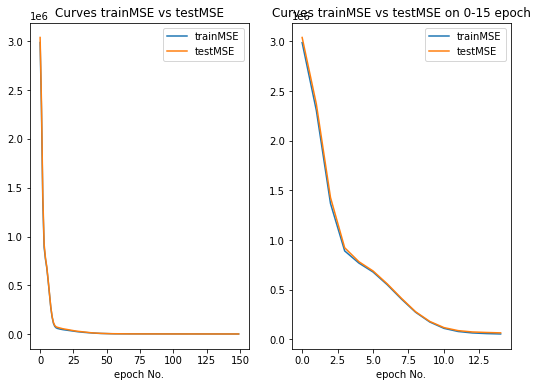

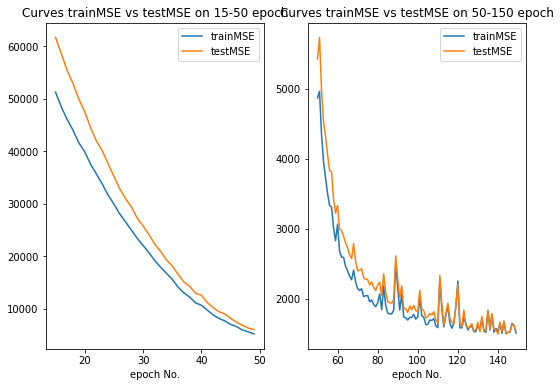

In [ ]:
#create epoch train and test MSE
epoch_df8 = pd.DataFrame(list(zip(epoch_loss, val_loss)), columns = ["trainMSE", "testMSE"])
epoch_df8.to_csv('HW1_Nguyen_TrainTestMSE56.csv', index=False)
epoch_df8.index.name = "epoch No."
#epoch_df8.head(10)

#plot
plt.subplot(1,4,1)
epoch_df8['trainMSE'].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE")
plt.xlabel("epoch No.")
plt.legend()

plt.subplot(1,4,2)
epoch_df8['trainMSE'].iloc[0:15,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[0:15,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 0-15 epoch")
plt.xlabel("epoch No.")
plt.legend()
plt.show() 

plt.subplot(1,4,3)
epoch_df8['trainMSE'].iloc[15:50,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[15:50,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 15-50 epoch")
plt.xlabel("epoch No.")
plt.legend()

plt.subplot(1,4,4)
epoch_df8['trainMSE'].iloc[50:,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[50:,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 50-150 epoch")
plt.xlabel("epoch No.")
plt.legend()

plt.show()
#plt.tight_layout()

In [ ]:
#access hidden layer activity
#use bestModel.layers[0] as a function.


bestModel8.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 56)                952       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 57        
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
bestModel8.layers[0]

In [ ]:
av_j = np.mean(bestModel8.layers[0](X).numpy(), axis = 0)

In [ ]:
bestModel8.layers[0](X).numpy()

array([[  686.74664,  1195.8666 ,  2949.6672 , ...,   926.7103 ,
           78.53267,  2707.3748 ],
       [  678.0618 ,  1194.7479 ,  2974.7678 , ...,   918.5503 ,
           76.40614,  2712.8064 ],
       [  671.1091 ,  1214.7676 ,  3014.5862 , ...,   914.6458 ,
           76.04338,  2725.8318 ],
       ...,
       [ 3937.3254 , 11307.642  , 17872.293  , ...,  5233.8027 ,
          370.17578, 11826.106  ],
       [ 3883.0205 , 11099.132  , 17829.564  , ...,  5164.766  ,
          391.50427, 11844.852  ],
       [ 3818.9834 , 11035.914  , 17788.727  , ...,  5092.026  ,
          387.8479 , 11787.107  ]], dtype=float32)

In [ ]:
best = bestModel8.layers[0](X).numpy()
#best.shape
bestMLP = pd.DataFrame(best, columns = [str(x) for x in range(1,57)])

print(bestMLP)
print(type(bestMLP))

                1             2  ...          55            56
0      686.746643   1195.866577  ...   78.532669   2707.374756
1      678.061829   1194.747925  ...   76.406143   2712.806396
2      671.109070   1214.767578  ...   76.043381   2725.831787
3      639.178772   1185.386719  ...   83.814896   2691.835693
4      732.673767   1324.108521  ...   81.573242   2800.334229
...           ...           ...  ...         ...           ...
1267  3950.706787  11473.263672  ...  347.225372  11662.831055
1268  3885.723389  11383.480469  ...  377.061646  11740.774414
1269  3937.325439  11307.641602  ...  370.175781  11826.106445
1270  3883.020508  11099.131836  ...  391.504272  11844.851562
1271  3818.983398  11035.914062  ...  387.847900  11787.107422

[1272 rows x 56 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
AVj = bestMLP.mean(axis=0)
print (AVj)
AVj = pd.Series(bestMLP.mean(axis=0), name="AVj")
dfAV = AVj.to_frame()
#dfAV

1      1872.139771
2      5108.103027
3      8434.800781
4      2148.891357
5     10428.578125
6      2054.127441
7     13211.969727
8      9673.635742
9       201.088669
10    10133.755859
11     4432.458496
12     1684.218140
13    13796.487305
14     2026.156860
15    13080.013672
16    14030.232422
17     5504.161621
18     7966.145508
19        0.023786
20     8546.936523
21     3249.878418
22     3062.454590
23     1863.096313
24     4687.311035
25     9134.717773
26     2823.177002
27    12856.329102
28     3969.438721
29     7441.854004
30    12181.361328
31    12918.002930
32    12744.936523
33     6871.043945
34     4005.530273
35    13473.894531
36     1549.230591
37     5128.951660
38     8567.296875
39      761.884216
40     8811.742188
41        0.000000
42        0.000000
43    13362.530273
44     2180.844971
45      134.585556
46     1270.135864
47    12535.351562
48     8350.664062
49     1907.837891
50     2309.624268
51     9400.091797
52    13476.949219
53     6256.

In [ ]:
#dfAV['sorted_AVj']
dfAV['AVj'].sort_values(ascending=True)

42        0.000000
41        0.000000
19        0.023786
45      134.585556
55      193.714676
9       201.088669
39      761.884216
46     1270.135864
36     1549.230591
12     1684.218140
23     1863.096313
1      1872.139771
49     1907.837891
14     2026.156860
6      2054.127441
4      2148.891357
44     2180.844971
50     2309.624268
54     2486.606689
26     2823.177002
22     3062.454590
21     3249.878418
28     3969.438721
34     4005.530273
11     4432.458496
24     4687.311035
2      5108.103027
37     5128.951660
17     5504.161621
56     5954.342773
53     6256.547363
33     6871.043945
29     7441.854004
18     7966.145508
48     8350.664062
3      8434.800781
20     8546.936523
38     8567.296875
40     8811.742188
25     9134.717773
51     9400.091797
8      9673.635742
10    10133.755859
5     10428.578125
30    12181.361328
47    12535.351562
32    12744.936523
27    12856.329102
31    12918.002930
15    13080.013672
7     13211.969727
43    13362.530273
35    13473.

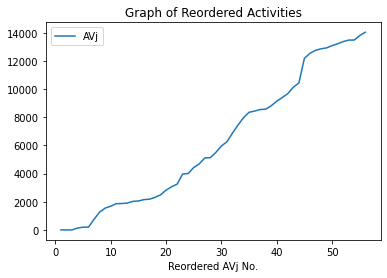

In [ ]:
s1 = dfAV['AVj'].sort_values(ascending=True, ignore_index = True)
s1.index += 1 
s1
s1.plot(label = "AVj")
plt.title ("Graph of Reordered Activities")
plt.xlabel("Reordered AVj No.")
plt.legend()
plt.show()

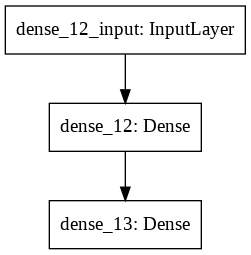

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model8)

In [ ]:
model8.layers[0].get_weights()[0].shape

(16, 56)

In [ ]:
weightActive = []
for x in range(0,16):
    weightActive.append(model8.layers[0].get_weights()[0][x,28])

#weightActive
#weightActive = pd.Series(weightActive, name="w")
weightActive = pd.DataFrame({'w':weightActive})
weightActive.index += 1 
weightActive

weightActive['w'].sort_index(ascending=True)

1    -0.985058
2     2.113949
3     0.841719
4     0.226092
5    -1.801887
6     0.918087
7     0.459274
8     0.315167
9    -1.644975
10    0.347340
11   -0.003527
12   -0.361601
13   -1.229739
14    0.227404
15    0.480205
16   -0.584391
Name: w, dtype: float64

In [ ]:
weightActive['w'].sort_values(ascending=False)

2     2.113949
6     0.918087
3     0.841719
15    0.480205
7     0.459274
10    0.347340
8     0.315167
14    0.227404
4     0.226092
11   -0.003527
12   -0.361601
16   -0.584391
1    -0.985058
13   -1.229739
9    -1.644975
5    -1.801887
Name: w, dtype: float64

In [ ]:
weightInactive = []
for x in range(0,16):
    weightInactive.append(model8.layers[0].get_weights()[0][x,47])

#weightInactive
#weightInactive = pd.Series(weightInactive, name="w")
weightInactive = pd.DataFrame({'w':weightInactive})
weightInactive.index += 1 
weightInactive

weightInactive['w'].sort_index(ascending=True)

1     0.729962
2     1.735706
3     0.010415
4     1.596443
5     0.392994
6     1.303966
7    -0.304066
8     1.483590
9     0.703150
10    0.803049
11   -0.278735
12    1.585115
13    0.511442
14    1.054856
15    0.197391
16    1.458235
Name: w, dtype: float64

In [ ]:
weightInactive['w'].sort_values(ascending=False)

2     1.735706
4     1.596443
12    1.585115
8     1.483590
16    1.458235
6     1.303966
14    1.054856
10    0.803049
1     0.729962
9     0.703150
13    0.511442
5     0.392994
15    0.197391
3     0.010415
11   -0.278735
7    -0.304066
Name: w, dtype: float64

In [ ]:
matrix = model8.layers[0].get_weights()[0]
#wmatrix = pd.DataFrame(matrix)
wmatrix = pd.DataFrame(matrix, columns = [str(x) for x in range(1,57)])
wmatrix.index+=1
wmatrix
wmatrix['Stock time'] = ['AAPL(t)','AMZN(t)','GOOG(t)','MSFT(t)', 'AAPL(t-1)','AMZN(t-1)','GOOG(t-1)','MSFT(t-1)', 'AAPL(t-2)','AMZN(t-2)','GOOG(t-2)','MSFT(t-2)', 'AAPL(t-3)','AMZN(t-3)','GOOG(t-3)','MSFT(t-3)'] 
wmatrix.to_csv('HW1_Nguyen_16x56_WeightFeature_Matrix.csv', index=False)
wmatrix


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Stock time
1,0.572160,-0.069809,0.658783,0.752516,1.168281,1.115465,1.487927,1.276691,-0.150992,-1.225440,-0.216899,0.618897,1.564011,-0.082270,1.626865,1.643376,0.089740,1.121719,-0.247543,-1.177193,1.164785,-0.449234,0.388609,0.049764,0.637298,1.053390,1.348805,-0.328511,-0.985058,1.135235,1.437483,1.520786,0.737711,-0.687334,1.654112,0.458627,0.012028,0.964349,1.066339,0.559636,-2.661173,0.109945,1.662151,-0.036419,-0.225930,0.401371,1.145128,0.729962,0.212979,0.495636,0.749055,-1.305516,-1.198516,1.008473,0.234326,-1.105968,AAPL(t)
2,1.715238,2.563087,1.910179,2.549271,2.191857,2.155923,2.488469,1.736289,0.123163,3.139871,2.066109,2.013516,2.028671,1.508491,1.938625,2.198056,2.989284,1.984982,0.223961,2.683958,2.136412,1.522018,2.001075,2.543096,2.012189,1.793127,2.079611,1.651506,2.113949,1.978441,2.414636,2.140430,1.974378,1.910091,1.950415,1.442367,2.531259,1.969777,1.929018,1.993024,-7.014981,-0.207735,2.241359,1.671055,0.081933,1.788808,2.364356,1.735706,1.782498,2.006321,2.098346,3.866011,1.874726,2.184618,0.040813,1.930578,AMZN(t)
3,0.437032,0.051492,-0.110841,-1.732091,0.002733,-0.044613,0.502509,0.194474,-0.264365,-0.083756,0.008899,0.385518,0.460661,0.376871,0.300846,0.667631,0.101653,-0.240362,-0.108117,0.068834,0.428190,0.721641,-1.243977,-0.047549,-0.275471,0.474890,0.089390,0.972502,0.841719,0.323696,0.212184,0.425999,-0.205737,0.645820,0.613382,0.424792,-0.235730,-0.320235,0.336048,-0.346974,-5.937631,-0.038606,0.381105,0.510673,-0.052216,0.590033,0.092503,0.010415,0.833958,-1.070595,-0.218343,-0.342278,0.868109,0.629869,-0.054169,0.889075,GOOG(t)
4,-0.566370,-0.001280,1.900717,2.153426,2.039234,-0.963950,2.188813,1.689913,-0.016608,1.310894,0.236805,-1.142282,2.361710,-0.007635,1.798970,2.250789,-3.152023,1.822657,0.202276,0.965876,-0.923802,-0.009050,1.617451,-0.026816,1.510702,-1.483609,2.086010,-0.215375,0.226092,1.966282,2.464678,1.870086,1.800546,0.289880,1.954118,-0.715583,0.526744,1.460784,-1.028290,1.751192,-2.369892,0.171782,1.894409,-0.278369,0.086270,-0.523890,2.161330,1.596443,-0.385364,1.417636,1.604587,1.500123,0.616029,-1.059798,-0.182519,0.156271,MSFT(t)
5,0.192477,-0.440726,0.366686,0.014555,0.743742,0.561352,0.927586,0.919154,-0.160581,-1.541715,-0.418179,0.611336,1.349595,-0.335344,1.385428,1.421898,-0.584860,0.586750,-0.139860,-1.648623,0.398578,-0.830562,0.270064,-0.122092,0.379952,0.650599,1.370655,-0.768504,-1.801887,0.954843,1.428656,1.106103,0.698525,-0.671391,1.337455,-0.120786,-0.366001,0.577462,0.632325,0.615880,-2.965851,0.210572,1.115952,-0.361671,0.195752,0.261751,1.226668,0.392994,0.157372,0.402298,1.019973,-2.163438,-1.519327,0.420374,0.218890,-1.287708,AAPL(t-1)
6,0.345445,0.944718,1.404048,1.537955,1.434345,0.525131,1.347319,1.080020,-0.340506,1.965921,0.551355,0.301565,1.783741,0.591527,1.804339,1.673588,1.526482,1.264527,-0.203935,1.903151,0.570494,0.421447,1.420593,1.392720,1.288829,0.824256,1.770313,0.307108,0.918087,1.740721,1.540175,1.719652,1.339719,0.294915,1.548130,0.352841,1.011688,1.070070,0.182113,1.380223,-6.041648,-0.263204,1.654943,0.338048,0.094773,-0.050690,1.586323,1.303966,0.298761,1.168918,1.473390,2.178342,0.567320,0.280961,-0.039747,0.567963,AMZN(t-1)
7,-0.231324,-0.888416,-0.434206,-2.134453,-0.191259,-0.375544,0.404073,-0.183889,0.265295,-0.422977,-0.027220,0.078128,0.553203,0.250175,0.431700,0.343001,-0.923581,-0.186638,0.134574,-0.398959,-0.321617,0.457154,-1.872019,-0.884566,-0.322326,-0.231010,0.553183,0.466323,0.459274,0.390311,0.422541,0.505210,-0.558770,0.234513,0.459269,0.251161,-0.275216,-0.212590,-0.255872,0.101055,-5.582643,-0.172894,0.032747,-0.027320,-0.105512,0.188477,0.025685,-0.304066,0.030407,-1.274086,-0.023236,-0.454270,0.349765,-0.098048,-0.014294,0.338368,GOOG(t-1)
8,-1.268685,-0.006671,1.583486,1.901263,1.630192,-1.074701,1.817933,2.020735,-0.009200,0.570835,-0.508231,-1

In [ ]:
print(wmatrix.iloc[:,[28,56]])
NR29 = wmatrix.iloc[:,[28,56]].sort_values(by=wmatrix.columns[28], ascending=False) 
print(NR29)

          29 Stock time
1  -0.985058    AAPL(t)
2   2.113949    AMZN(t)
3   0.841719    GOOG(t)
4   0.226092    MSFT(t)
5  -1.801887  AAPL(t-1)
6   0.918087  AMZN(t-1)
7   0.459274  GOOG(t-1)
8   0.315167  MSFT(t-1)
9  -1.644975  AAPL(t-2)
10  0.347340  AMZN(t-2)
11 -0.003527  GOOG(t-2)
12 -0.361601  MSFT(t-2)
13 -1.229739  AAPL(t-3)
14  0.227404  AMZN(t-3)
15  0.480205  GOOG(t-3)
16 -0.584391  MSFT(t-3)
          29 Stock time
2   2.113949    AMZN(t)
6   0.918087  AMZN(t-1)
3   0.841719    GOOG(t)
15  0.480205  GOOG(t-3)
7   0.459274  GOOG(t-1)
10  0.347340  AMZN(t-2)
8   0.315167  MSFT(t-1)
14  0.227404  AMZN(t-3)
4   0.226092    MSFT(t)
11 -0.003527  GOOG(t-2)
12 -0.361601  MSFT(t-2)
16 -0.584391  MSFT(t-3)
1  -0.985058    AAPL(t)
13 -1.229739  AAPL(t-3)
9  -1.644975  AAPL(t-2)
5  -1.801887  AAPL(t-1)


In [ ]:
print(wmatrix.iloc[:,[47,56]])
NR48 = wmatrix.iloc[:,[47,56]].sort_values(by=wmatrix.columns[47], ascending=False) 
print(NR48)

          48 Stock time
1   0.729962    AAPL(t)
2   1.735706    AMZN(t)
3   0.010415    GOOG(t)
4   1.596443    MSFT(t)
5   0.392994  AAPL(t-1)
6   1.303966  AMZN(t-1)
7  -0.304066  GOOG(t-1)
8   1.483590  MSFT(t-1)
9   0.703150  AAPL(t-2)
10  0.803049  AMZN(t-2)
11 -0.278735  GOOG(t-2)
12  1.585115  MSFT(t-2)
13  0.511442  AAPL(t-3)
14  1.054856  AMZN(t-3)
15  0.197391  GOOG(t-3)
16  1.458235  MSFT(t-3)
          48 Stock time
2   1.735706    AMZN(t)
4   1.596443    MSFT(t)
12  1.585115  MSFT(t-2)
8   1.483590  MSFT(t-1)
16  1.458235  MSFT(t-3)
6   1.303966  AMZN(t-1)
14  1.054856  AMZN(t-3)
10  0.803049  AMZN(t-2)
1   0.729962    AAPL(t)
9   0.703150  AAPL(t-2)
13  0.511442  AAPL(t-3)
5   0.392994  AAPL(t-1)
15  0.197391  GOOG(t-3)
3   0.010415    GOOG(t)
11 -0.278735  GOOG(t-2)
7  -0.304066  GOOG(t-1)
